# Forecasting Future Electric Energy Production

## Part 1: Exploratory Data Analysis

Import packages needed for data manipulation, analysis, and visualization.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

Read in data on total electricity generation amounts (in kilowatt-hours) per person for different countries over time, then examine and preprocess the data.

In [2]:
energy_data = pd.read_csv("electricity_generation_total.csv")
energy_data.shape

(65, 33)

In [3]:
energy_data.head()

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,1.230000e+10,1.300000e+10,1.270000e+10,1.400000e+10,1.530000e+10,1.610000e+10,1.730000e+10,1.830000e+10,1.940000e+10,...,3.730000e+10,4.020000e+10,4.310000e+10,4.570000e+10,5.310000e+10,5.740000e+10,5.990000e+10,6.420000e+10,6.880000e+10,7.020000e+10
1,Argentina,4.530000e+10,4.910000e+10,5.210000e+10,5.310000e+10,5.090000e+10,5.110000e+10,5.390000e+10,5.650000e+10,6.160000e+10,...,1.150000e+11,1.290000e+11,1.300000e+11,1.330000e+11,1.290000e+11,1.360000e+11,1.400000e+11,1.420000e+11,1.450000e+11,1.470000e+11
2,Australia,1.240000e+11,1.300000e+11,1.360000e+11,1.430000e+11,1.510000e+11,1.560000e+11,1.580000e+11,1.610000e+11,1.650000e+11,...,2.430000e+11,2.450000e+11,2.500000e+11,2.510000e+11,2.560000e+11,2.510000e+11,2.500000e+11,2.470000e+11,2.530000e+11,2.570000e+11
3,Austria,4.450000e+10,4.470000e+10,5.050000e+10,4.900000e+10,5.020000e+10,5.040000e+10,5.150000e+10,5.120000e+10,5.270000e+10,...,6.490000e+10,6.690000e+10,6.910000e+10,7.110000e+10,6.590000e+10,7.240000e+10,6.800000e+10,6.510000e+10,6.490000e+10,6.760000e+10
4,Azerbaijan,2.070000e+10,2.150000e+10,2.290000e+10,2.360000e+10,2.330000e+10,2.320000e+10,2.340000e+10,1.970000e+10,1.910000e+10,...,2.180000e+10,2.160000e+10,1.890000e+10,1.870000e+10,2.030000e+10,2.300000e+10,2.340000e+10,2.470000e+10,2.470000e+10,2.500000e+10


In [4]:
energy_data.tail()

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
60,United Kingdom,2.980000e+11,3.010000e+11,3.020000e+11,3.090000e+11,3.150000e+11,3.200000e+11,3.230000e+11,3.210000e+11,3.230000e+11,...,3.970000e+11,3.890000e+11,3.770000e+11,3.820000e+11,3.670000e+11,3.640000e+11,3.580000e+11,3.380000e+11,3.390000e+11,3.390000e+11
61,United States,2.630000e+12,2.650000e+12,2.740000e+12,2.880000e+12,3.160000e+12,3.230000e+12,3.270000e+12,3.280000e+12,3.400000e+12,...,4.430000e+12,4.390000e+12,4.210000e+12,4.390000e+12,4.360000e+12,4.310000e+12,4.330000e+12,4.360000e+12,4.350000e+12,4.350000e+12
62,Uzbekistan,4.790000e+10,5.220000e+10,5.480000e+10,5.060000e+10,5.590000e+10,5.630000e+10,5.420000e+10,5.110000e+10,4.870000e+10,...,4.900000e+10,5.010000e+10,5.000000e+10,5.170000e+10,5.240000e+10,5.250000e+10,5.420000e+10,5.560000e+10,5.760000e+10,5.890000e+10
63,Venezuela,4.730000e+10,5.010000e+10,5.410000e+10,5.820000e+10,5.760000e+10,5.930000e+10,6.330000e+10,6.740000e+10,6.940000e+10,...,1.140000e+11,1.190000e+11,1.250000e+11,1.170000e+11,1.230000e+11,1.280000e+11,1.280000e+11,1.100000e+11,1.280000e+11,1.160000e+11
64,Vietnam,5.070000e+09,5.680000e+09,6.210000e+09,6.960000e+09,7.950000e+09,8.680000e+09,9.210000e+09,9.710000e+09,1.070000e+10,...,6.410000e+10,7.100000e+10,8.060000e+10,9.170000e+10,1.020000e+11,1.150000e+11,1.240000e+11,1.420000e+11,1.600000e+11,1.760000e+11


In [5]:
us_energy_data = energy_data[energy_data["country"] == "United States"]
us_energy_data

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
61,United States,2.630000e+12,2.650000e+12,2.740000e+12,2.880000e+12,3.160000e+12,3.230000e+12,3.270000e+12,3.280000e+12,3.400000e+12,...,4.430000e+12,4.390000e+12,4.210000e+12,4.390000e+12,4.360000e+12,4.310000e+12,4.330000e+12,4.360000e+12,4.350000e+12,4.350000e+12


In [6]:
us_energy_data.set_index('country', inplace = True)

In [7]:
us_energy_data

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
United States,2.630000e+12,2.650000e+12,2.740000e+12,2.880000e+12,3.160000e+12,3.230000e+12,3.270000e+12,3.280000e+12,3.400000e+12,3.460000e+12,...,4.430000e+12,4.390000e+12,4.210000e+12,4.390000e+12,4.360000e+12,4.310000e+12,4.330000e+12,4.360000e+12,4.350000e+12,4.350000e+12


In [8]:
years = us_energy_data.columns.tolist()
years_with_last_day = [str(year) for year in years]
us_energy_data.columns = pd.to_datetime(years_with_last_day)

In [9]:
us_energy_data

,1985-01-01 00:00:00,1986-01-01 00:00:00,1987-01-01 00:00:00,1988-01-01 00:00:00,1989-01-01 00:00:00,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,...,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00
country,,,,,,,,,,,,,,,,,,,,,
United States,2.630000e+12,2.650000e+12,2.740000e+12,2.880000e+12,3.160000e+12,3.230000e+12,3.270000e+12,3.280000e+12,3.400000e+12,3.460000e+12,...,4.430000e+12,4.390000e+12,4.210000e+12,4.390000e+12,4.360000e+12,4.310000e+12,4.330000e+12,4.360000e+12,4.350000e+12,4.350000e+12


In [10]:
us_energy_time_series_data = us_energy_data.T
us_energy_time_series_data.columns = ["United States"]
us_energy_time_series_data.head()

,United States
1985-01-01,2.630000e+12
1986-01-01,2.650000e+12
1987-01-01,2.740000e+12
1988-01-01,2.880000e+12
1989-01-01,3.160000e+12


Perform a decomposition of the time series data

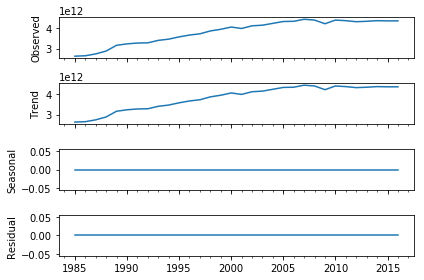

In [11]:
decomp = seasonal_decompose(us_energy_time_series_data)
decomp_fig = decomp.plot()

## Part 2: Model Selection - Auto Arima

Have the arima model automatically build itself by selecting a range of models with varying parameters and then seeing how their Akaike information criterion (AIC) scores compare to each other. The model that has the best combination of goodness of fit and simplicity will have the best (lowest) AIC score, and this model will be used to forecast future energy production levels.

In [12]:
model = auto_arima(us_energy_time_series_data, start_p=1, start_q=1,
                           max_p=20, max_q=20, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True) 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1025.120, BIC=1027.009, Fit time=0.024 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1024.512, BIC=1028.290, Fit time=0.083 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1024.097, BIC=1026.930, Fit time=0.041 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1025.891, BIC=1029.668, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan 

In [13]:
model.aic()

1024.0971206786198

## Part 3: Predictive Modeling and Cross-Validation

In [14]:
us_energy_time_series_data

,United States
1985-01-01,2.630000e+12
1986-01-01,2.650000e+12
1987-01-01,2.740000e+12
1988-01-01,2.880000e+12
1989-01-01,3.160000e+12
1990-01-01,3.230000e+12
1991-01-01,3.270000e+12
1992-01-01,3.280000e+12
1993-01-01,3.400000e+12
1994-01-01,3.460000e+12


In [15]:
us_energy_time_series_data.shape

(32, 1)

Split the data into training and test sets.

In [16]:
training_data = us_energy_time_series_data.iloc[0:27,]
print(training_data.size)
training_data

27


,United States
1985-01-01,2.630000e+12
1986-01-01,2.650000e+12
1987-01-01,2.740000e+12
1988-01-01,2.880000e+12
1989-01-01,3.160000e+12
1990-01-01,3.230000e+12
1991-01-01,3.270000e+12
1992-01-01,3.280000e+12
1993-01-01,3.400000e+12
1994-01-01,3.460000e+12


In [17]:
test_data = us_energy_time_series_data.iloc[27:,]
print(test_data.size)
test_data

5


,United States
2012-01-01,4.310000e+12
2013-01-01,4.330000e+12
2014-01-01,4.360000e+12
2015-01-01,4.350000e+12
2016-01-01,4.350000e+12


In [18]:
model.fit(training_data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [19]:
forecast = model.predict(n_periods = 5)

In [20]:
forecast

array([4.41139649e+12, 4.27893911e+12, 4.34677070e+12, 4.31458063e+12,
       4.34239218e+12])

In [21]:
electric_energy_forecast = pd.DataFrame(forecast, index = test_data.index, columns = ["Electricity Production Forecast"])

In [22]:
electric_energy_forecast

,Electricity Production Forecast
2012-01-01,4.411396e+12
2013-01-01,4.278939e+12
2014-01-01,4.346771e+12
2015-01-01,4.314581e+12
2016-01-01,4.342392e+12


In [23]:
test_data

,United States
2012-01-01,4.310000e+12
2013-01-01,4.330000e+12
2014-01-01,4.360000e+12
2015-01-01,4.350000e+12
2016-01-01,4.350000e+12


## Part 4: Visualization and Evaluation of Results

Compare predicted electricity production values with actual electricity production values, for the next 5 years.

In [24]:
side_by_side = pd.concat([electric_energy_forecast, test_data], axis=1)
side_by_side

,Electricity Production Forecast,United States
2012-01-01,4.411396e+12,4.310000e+12
2013-01-01,4.278939e+12,4.330000e+12
2014-01-01,4.346771e+12,4.360000e+12
2015-01-01,4.314581e+12,4.350000e+12
2016-01-01,4.342392e+12,4.350000e+12


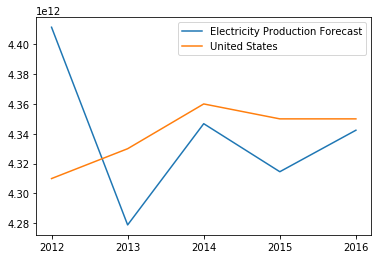

In [25]:
side_by_side.plot()

In [26]:
abs_diff = abs(side_by_side["Electricity Production Forecast"] - side_by_side["United States"])

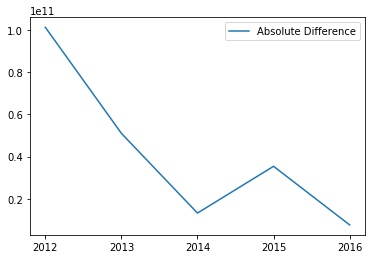

In [27]:
abs_diff_df = pd.DataFrame(abs_diff, index = side_by_side.index, columns = ["Absolute Difference"])
abs_diff_df.plot()

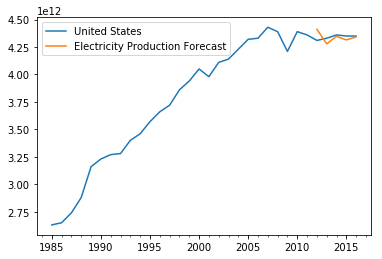

In [28]:
overall_time_series_forecast = pd.concat([us_energy_time_series_data, electric_energy_forecast], axis=1)
overall_time_series_forecast.plot()

# Next Steps...